In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
# Reading in the data
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";", index_col=0)
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";", index_col=0)

In [293]:
train_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,6.0,4.0,2.0,-1.0,9.0,2.0,3,0,1,4
3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


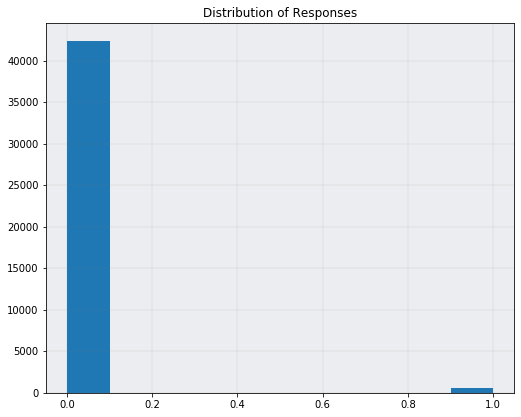

In [294]:
# Graphing the distribution of the RESPONSE variable for the training data
plt.figure(figsize=(8.4, 6.8))
plt.hist(train_data["RESPONSE"])
ax = plt.gca()
ax.set_facecolor('#ebedf0')
plt.title("Distribution of Responses")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('images/responses_hist')

In [295]:
# Calculating the percentage of positive outcomes for the training data
len(train_data[train_data["RESPONSE"]==1]) / len(train_data)

0.012383036171500396

In [296]:
# Splitting the training data into features and labels
X_train = train_data.loc[:, train_data.columns != 'RESPONSE']
y_train = train_data['RESPONSE']

In [8]:
# Using logistic regrsssion to create the benchmark model

# importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression model with lasso regularization
lr_baseline = LogisticRegression(penalty='l1',
                                 class_weight='balanced',
                                 solver='saga',
                                 max_iter=5000)

In [9]:
# Training the baseline model
lr_baseline.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, penalty='l1',
                   solver='saga')

In [8]:
# Importing functions for calculating accuracy, precision, and recall
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [11]:
# Getting predictions for the training set
y_pred = lr_baseline.predict(X_train)

In [12]:
y_train.value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

In [13]:
# Calculating the accuracy, precision, and recall
print("The accuracy is", accuracy_score(y_train, y_pred))
print("The recall is", recall_score(y_train, y_pred))
print("The precision is", precision_score(y_train, y_pred))

The accuracy is 0.6927750104743727
The recall is 0.6033834586466166
The precision is 0.024119017206401683


In [14]:
# Viewing the coefficents learned by the model
coefs = lr_baseline.coef_
print(coefs)

[[ 1.84193006e-01 -2.08295847e-01 -2.22455245e-02 -9.12754311e-02
  -1.47698069e-01  9.91378306e-02  1.88730522e-01  5.84308074e-02
   1.35197286e-01  3.81220314e-02 -1.21448160e-03  1.06939763e-01
  -1.55086276e-01 -1.70419089e-02 -1.57224694e-01 -1.23067595e-01
   8.48365563e-02 -2.04623146e-02  4.11235285e-02  3.65846556e-02
   7.44170286e-02 -4.56633621e-02  2.20316440e-02  5.21517019e-02
   1.16008716e-01 -3.06089754e-01 -1.98483858e-02 -2.37443124e-01
   9.23035653e-02 -9.50171876e-02  1.60189163e-01 -1.21329162e-01
   1.59633168e-01 -8.80138034e-02 -1.55534768e-01  5.36830753e-03
  -7.79909519e-02 -7.45420614e-02 -6.13334957e-02  1.53918448e-01
   5.51104311e-02 -9.30898680e-02 -1.18499863e-01 -1.27144609e-01
   3.05624926e-01 -1.18348482e-01  1.30752613e-01  2.15535047e-03
   9.04879141e-02  4.30147311e-02 -1.22635459e-01 -4.85115547e-01
  -9.81385572e-01  8.52208369e-02 -7.97882348e-02 -1.04793183e-01
   1.07607888e-01 -1.67739350e-01  1.08417395e-01  5.36499726e-02
  -8.30091

In [15]:
print(len(coefs[0]))

358


In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
features_scaled = scalar.transform(X_train)

In [297]:
# Importing the SMOTE class in order to oversample the positive class
from imblearn.over_sampling import SMOTE

# Creating the SMOTE model
smote = SMOTE()

In [298]:
# Fitting the SMOTE model to the training data and resampling the training data
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

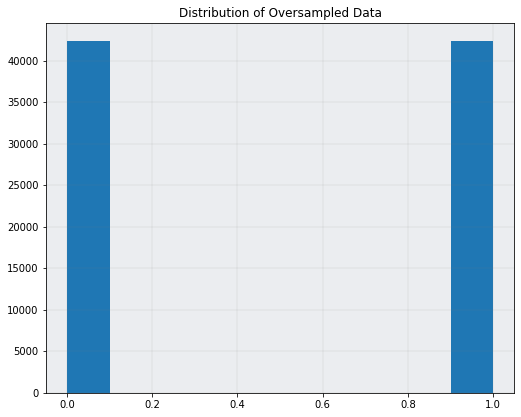

In [299]:
# Visualizing the new distribution of the RESPONSE column
plt.figure(figsize=(8.4, 6.8))
y_train_over.hist()
ax = plt.gca()
ax.set_facecolor('#ebedf0')
plt.title("Distribution of Oversampled Data")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('images/over_hist')

In [12]:
X_train_over.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,...,2.0,5.0,2.0,1.0,6.0,9.0,3.0,3,2,4
1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,...,3.0,1.0,2.0,1.0,4.0,9.0,7.0,1,2,3
2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,1.0,6.0,4.0,2.0,-1.0,9.0,2.0,3,1,4
3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,...,4.0,8.0,11.0,11.0,6.0,9.0,1.0,3,2,4
4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,...,4.0,2.0,2.0,1.0,6.0,9.0,3.0,3,1,3


In [13]:
# Retraining the baseline with the balanced data

# Creating the logistic regression model with lasso regularization
lr_baseline = LogisticRegression(penalty='l1',
                                 class_weight='balanced',
                                 solver='saga',
                                 max_iter=10000)

In [19]:
# Training the baseline model with the balanced data
lr_baseline.fit(X_train_over, y_train_over)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='saga')

In [20]:
# Getting predictions for the training set
y_pred = lr_baseline.predict(X_train_over)

In [21]:
# Calculating the accuracy, precision, and recall
print("The accuracy is", accuracy_score(y_train_over, y_pred))
print("The recall is", recall_score(y_train_over, y_pred))
print("The precision is", precision_score(y_train_over, y_pred))

The accuracy is 0.867911854819703
The recall is 0.8610417157671458
The precision is 0.8730374937271489


In [18]:
# Using cross validation to select a model

# Importing the cross validation function
from sklearn.model_selection import cross_validate

# Importing the classes that will be used to create the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Creating the models

# Random forest model
rf_classifier = RandomForestClassifier(n_estimators=200)
# Gradient boosting model
gb_classifier = GradientBoostingClassifier(n_estimators=200)
# XGBoost model
xgb_classifier = XGBClassifier()
# K nearest neighbors model
knn_classifier= KNeighborsClassifier()
# Naive bayes model
nb_classifier = GaussianNB()
# Support vector machine model
svm_classifier = SVC(max_iter=500)
# Logistic regression classifier
lr_classifier = LogisticRegression(penalty='l1',
                                   solver='saga',
                                   max_iter=10000)

# Dictionary that will hold the accuracy, recall, and precision values for the cross validation process for each model
cv_scores = {"Random Forest": None, "Gradient Boosting": None, "XGBoost": None,
             "K Nearest Neighbors": None, "Naive Bayes": None, "Logistic Regression": None}

In [15]:
# Combining the feature and the labels to get a random sample
X_train_over["RESPONSE"] = y_train_over
# Renaming the dataframe
sampled_combined = X_train_over.copy()
# Getting a random sample from the data to reduce the runtime of the cross validation iterations
df_sample = sampled_combined.sample(10000)

In [16]:
df_sample.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,RESPONSE
19790,1,1.0,12.0,12.0,7.0,0.0,0.0,1.0,7.0,0.0,...,1.0,1.0,1.0,6.0,9.0,2.0,4,1,4,0
9615,3,1.0,10.0,9.0,3.0,1.0,0.0,2.0,3.0,0.0,...,1.0,1.0,1.0,6.0,4.0,2.0,1,1,3,0
21507,-1,1.0,0.0,0.0,36.0,1.0,0.0,2.0,35.0,0.0,...,9.0,8.0,5.0,6.0,9.0,1.0,3,1,4,0
212,1,1.0,8.0,7.0,12.0,0.0,0.0,2.0,11.0,0.0,...,1.0,1.0,1.0,6.0,9.0,2.0,3,1,4,0
36975,-1,2.0,15.0,15.0,15.0,0.0,0.0,2.0,14.0,0.0,...,1.0,1.0,1.0,5.0,9.0,2.0,2,1,3,0


In [17]:
# Separating the data into features and labels
X_sample = df_sample.loc[:, df_sample.columns != "RESPONSE"]
y_sample = df_sample["RESPONSE"]

In [31]:
# Evaluating each machine learning model using cross validation

# Importing the cross validation function
from sklearn.model_selection import cross_validate

# Creating a dictionary where each the key is the model name and the value is the model
models = {"Random forest":rf_classifier, "GBM":gb_classifier, "XGBoost":xgb_classifier,
          "KNN":knn_classifier, "Naive Bayes":nb_classifier, "Support Vector Machine":svm_classifier,
          "Logistic Regression":lr_classifier}

# Looping through all the models
for model_name in models:
    # Performing 5 fold cross validation
    results = cross_validate(models[model_name], X_sample, y_sample, cv=5,
                             scoring=["recall", "precision", "accuracy"],
                             return_train_score=True)
    # Displaying the results
    print(model_name, '\n')
    
    # Displaying the training accuracy metrics
    print("The mean training accuracy is", results["train_accuracy"].mean())
    print("The mean training recall is", results["train_recall"].mean())
    print("The mean training precision is", results["train_precision"].mean())

    print('\n')

    # Displaying the test accuracy metrics
    print("The mean test accuracy is", results["test_accuracy"].mean())
    print("The mean test recall is", results["test_recall"].mean())
    print("The mean test precision is", results["test_precision"].mean())
    
    print('\n')

Random forest 

The mean training accuracy is 0.9509000000000001
The mean training recall is 0.9244640420334784
The mean training precision is 0.9758910012968487


The mean test accuracy is 0.9435
The mean test recall is 0.9104390964110403
The mean test precision is 0.9747298643448786


GBM 

The mean training accuracy is 0.94725
The mean training recall is 0.9172009809752237
The mean training precision is 0.9756525426710896


The mean test accuracy is 0.9454
The mean test recall is 0.9136451080338854
The mean test precision is 0.9754541360370474


XGBoost 

The mean training accuracy is 0.9509000000000001
The mean training recall is 0.9244640420334784
The mean training precision is 0.9758910012968487


The mean test accuracy is 0.9456
The mean test recall is 0.9142461098372922
The mean test precision is 0.9752584617477863


KNN 

The mean training accuracy is 0.7727499999999999
The mean training recall is 0.9373865687799341
The mean training precision is 0.7047947060307644


The mean 

In [25]:
# Performing feature selection and hyperparameter tuning for the best models

# Importing the libraries
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Creating pipelines for the different models
rf_pipline = Pipeline([
    ('selector', SelectKBest(f_classif)),
    ('model', RandomForestClassifier())
])

xgb_pipline = Pipeline([
    ('selector', SelectKBest(f_classif)),
    ('model', XGBClassifier())
])

knn_pipline = Pipeline([
    ('selector', SelectKBest(f_classif)),
    ('model', KNeighborsClassifier())
])

# Creating the parameter grids for each model
rf_param_grid = {
    'selector__k': [100, 230, 270, 300, 350],
    'model__max_depth': [3, 10, 20, 50, 100, 150, 200],
    'model__n_estimators': [100, 200, 300]
}

# Creating the grid search models for each model
rf_search = GridSearchCV(
    estimator = rf_pipline,
    param_grid = rf_param_grid,
    n_jobs=-1,
    scoring=['accuracy', 'recall', 'precision'],
    verbose=3,
    refit="accuracy"
)

xgb_param_grid = {
    'selector__k': [100, 230, 270, 300, 350],
    'model__max_depth': [3, 10, 20, 50, 100, 150, 200],
    'model__learning_rate': [0.001, 0.01, 0.05, 0.1]
}

xgb_search = GridSearchCV(
    estimator = xgb_pipline,
    param_grid = xgb_param_grid,
    n_jobs=-1,
    scoring=['accuracy', 'recall', 'precision'],
    verbose=3,
    refit="accuracy"
)

In [18]:
# Getting a random sample of 5000 points from the data in order to speed up the run time

# Combining the feature and the labels to get a random sample
X_train_over["RESPONSE"] = y_train_over
# Renaming the dataframe
sampled_combined = X_train_over.copy()
# Getting a random sample from the data to reduce the runtime of the cross validation iterations
df_sample = sampled_combined.sample(5000)

In [19]:
# Separating the data into features and labels
X_sample = df_sample.loc[:, df_sample.columns != "RESPONSE"]
y_sample = df_sample["RESPONSE"]

In [18]:
rf_search.fit(X_sample, y_sample)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:  5.0min finished


GridSearchCV(estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 10, 20, 50, 100, 150, 200],
                         'model__n_estimators': [100, 200, 300],
                         'selector__k': [100, 230, 270, 300, 350]},
             refit='accuracy', scoring=['accuracy', 'recall', 'precision'],
             verbose=3)

In [19]:
# Viewing the best model parameters
rf_search.best_params_

{'model__max_depth': 20, 'model__n_estimators': 300, 'selector__k': 350}

In [20]:
rf_search.best_score_

0.9322000000000001

In [21]:
# Using cross validation to evaluate the best random forest model
rf_tuned_results = cross_validate(rf_search.best_estimator_, X_sample, y_sample, cv=5,
                                  scoring=["recall", "precision", "accuracy"],
                                  return_train_score=True)

In [24]:
# Displaying the evaluation metrics
display_metrics(rf_tuned_results)

The mean training accuracy is 0.94345
The mean training recall is 0.9175728244088729
The mean training precision is 0.9669338707834945


The mean test accuracy is 0.9312000000000001
The mean test recall is 0.8984325306678782
The mean test precision is 0.9607043774434718


In [28]:
xgb_search.fit(X_sample, y_sample)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 34.9min finished


GridSearchCV(estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                    

In [30]:
# Viewing the best model parameters
xgb_search.best_params_

{'model__learning_rate': 0.1, 'model__max_depth': 10, 'selector__k': 230}

In [36]:
# Using cross validation to evaluate the best random forest model
xgb_tuned_results = cross_validate(xgb_search.best_estimator_, X_sample, y_sample, cv=5,
                                   scoring=["recall", "precision", "accuracy"],
                                   return_train_score=True)

In [37]:
display_metrics(xgb_tuned_results)

The mean training accuracy is 0.9492750000000001
The mean training recall is 0.9190910328175397
The mean training precision is 0.9778013438996311


The mean test accuracy is 0.9423
The mean test recall is 0.9058978139236988
The mean test precision is 0.9766745782030386


In [20]:
# Using random search to tune the hyperparamaters of the tree based models

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 300, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 30, 80, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
# Using random search to find for best hyperparameters

# Baseline model that will be tuned, all hyperparameters are set to default
rf_classifier = RandomForestClassifier()

# Random search of parameters using 3 fold cross validation, 
# search across 100 different combinations and use all available cores to speed up search
rf_random_search = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid,
                                      n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random_search.fit(X_sample, y_sample)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 18, 34, 49, 65, 81, 96,
                                                      112, 128, 143, 159, 174,
                                                      190, 206, 221, 237, 253,
                                                      268, 284, 300, None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 10, 30,
                                                             80, 100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         180

In [45]:
# Viewing the best set of parameters
rf_random_search.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 190,
 'bootstrap': False}

In [46]:
# Evaluating the random forest model with the tuned hyperparameters using cross validation

tuned_results = cross_validate(rf_random_search.best_estimator_, X_sample, y_sample, cv=5,
                               scoring=["recall", "precision", "accuracy"],
                               return_train_score=True)

In [23]:
def display_metrics(results):
    """
    Displays the accuracy, precision, and recall of a model that it trained using cross validation
    param results: A dictionary that holds the accuracy, recall, and precision of a model
    return: Displays the accuracy, recall, and precision of the model
    """
    
    # Displaying the training accuracy metrics
    print("The mean training accuracy is", results["train_accuracy"].mean())
    print("The mean training recall is", results["train_recall"].mean())
    print("The mean training precision is", results["train_precision"].mean())

    print('\n')

    # Displaying the test accuracy metrics
    print("The mean test accuracy is", results["test_accuracy"].mean())
    print("The mean test recall is", results["test_recall"].mean())
    print("The mean test precision is", results["test_precision"].mean())

In [48]:
# Displaying the evaluation metrics
display_metrics(tuned_results)

The mean training accuracy is 0.949325
The mean training recall is 0.9269743622945551
The mean training precision is 0.9719815306072966


The mean test accuracy is 0.9404
The mean test recall is 0.9113661223381561
The mean test precision is 0.9694884885105516


In [40]:
"HELLO"

'HELLO'

In [300]:
# Scaling the oversampled data so that all the columns are in the same range

# Scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train_over)
features_scaled = scalar.transform(X_train_over)

In [301]:
# Changing the type of the scaled data to a pandas dataframe
features_scaled = pd.DataFrame(features_scaled)
features_scaled.columns = X_train_over.columns
features_scaled.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1.156595,-0.015839,-0.026979,0.074096,0.901934,0.285797,0.163014,-0.323193,0.791172,0.385468,...,0.143477,0.476960,-0.432527,-0.514154,0.935755,0.486359,-0.068334,0.360929,1.048426,0.822446
1,0.360470,1.847572,0.750559,0.994623,-0.324200,0.285797,0.163014,0.320328,-0.317338,0.385468,...,0.753374,-0.714682,-0.432527,-0.514154,0.197896,0.486359,1.476673,-1.554724,1.048426,-0.133763
2,0.360470,-0.015839,0.128529,-0.110010,-0.411781,-1.730008,0.163014,-0.966713,-0.317338,0.385468,...,-0.466420,0.774870,0.153617,-0.123641,-1.646752,0.486359,-0.454586,0.360929,-0.953811,0.822446
3,1.156595,-0.015839,-0.337994,-0.294115,-0.061457,0.285797,0.163014,0.320328,-0.040210,0.385468,...,1.363272,1.370691,2.205122,3.390976,0.935755,0.486359,-0.840838,0.360929,1.048426,0.822446
4,1.156595,-0.015839,0.128529,0.258201,4.230012,0.285797,0.163014,-0.323193,3.654821,0.385468,...,1.363272,-0.416772,-0.432527,-0.514154,0.935755,0.486359,-0.068334,0.360929,-0.953811,-0.133763


In [302]:
# Creating an XGBoost model
xgb_classifier = XGBClassifier()

In [303]:
# Training the XGBoost model
xgb_classifier.fit(features_scaled, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

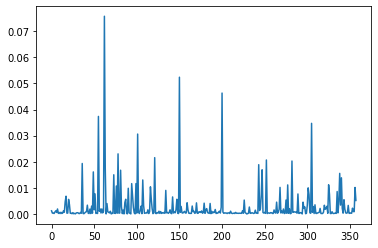

In [304]:
plt.plot(xgb_classifier.feature_importances_)

In [305]:
# Scaling the test data
test_data_scaled = scalar.transform(test_data)

In [306]:
# Turning the test data into an dataframe
test_data_scaled = pd.DataFrame(test_data_scaled)
test_data_scaled.columns = test_data.columns

In [307]:
# Getting predictions for the test data
predictions = xgb_classifier.predict_proba(test_data_scaled)

In [308]:
# Making sure that there are 42826 predictions
len(predictions)

42833

In [309]:
len(test_data)

42833

In [310]:
predictions = pd.DataFrame(predictions)
predictions.head()

,0,1
0,0.982508,0.017492
1,0.991062,0.008938
2,0.998876,0.001124
3,0.999781,0.000219
4,0.998082,0.001918


In [311]:
xgb_classifier.classes_

array([0, 1])

In [312]:
predictions.columns = ["Negative", "Positive"]

In [313]:
test_data_orig = pd.read_csv("../population-segmentation-data/Udacity_MAILOUT_052018_TEST.csv", sep=";")

In [314]:
test_data_orig.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4


In [315]:
test_data_orig.shape

(42833, 366)

In [316]:
# Getting the LNR from the original test data
LNR = test_data_orig["LNR"]

In [317]:
print(LNR[:10])

0    1754
1    1770
2    1465
3    1470
4    1478
5    1782
6    1485
7    1519
8    1835
9    1522
Name: LNR, dtype: int64


In [318]:
# Creating a dataframe that contains the LNR and predictions
submission_df = pd.DataFrame({'LNR': LNR, 'RESPONSE': predictions["Positive"]})

In [319]:
len(submission_df[submission_df["RESPONSE"]==1])

0

In [320]:
submission_df.to_csv('/Users/mani/Desktop/results.csv')

In [321]:
X_train["CAMEO_DEUG_2015"].unique()

array([ 5.,  2.,  7.,  4., -1.,  3.,  6.,  1.,  8.,  9.])